In [40]:
import pandas as pd
import seaborn as sns
from random import randint

In [8]:
data = pd.read_csv('../data/train.csv', header=0, index_col=0)

In [9]:
feature_cols = [
    'toxic',
    'severe_toxic',
    'obscene',
    'threat',
    'insult',
    'identity_hate'
]

In [10]:
y = data[feature_cols]
X = data['comment_text']

In [11]:
X.head(10)

id
0000997932d777bf    Explanation\nWhy the edits made under my usern...
000103f0d9cfb60f    D'aww! He matches this background colour I'm s...
000113f07ec002fd    Hey man, I'm really not trying to edit war. It...
0001b41b1c6bb37e    "\nMore\nI can't make any real suggestions on ...
0001d958c54c6e35    You, sir, are my hero. Any chance you remember...
00025465d4725e87    "\n\nCongratulations from me as well, use the ...
0002bcb3da6cb337         COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
00031b1e95af7921    Your vandalism to the Matt Shirvington article...
00037261f536c51d    Sorry if the word 'nonsense' was offensive to ...
00040093b2687caa    alignment on this subject and which are contra...
Name: comment_text, dtype: object

In [12]:
y.head(10)

,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,
0000997932d777bf,0,0,0,0,0,0
000103f0d9cfb60f,0,0,0,0,0,0
000113f07ec002fd,0,0,0,0,0,0
0001b41b1c6bb37e,0,0,0,0,0,0
0001d958c54c6e35,0,0,0,0,0,0
00025465d4725e87,0,0,0,0,0,0
0002bcb3da6cb337,1,1,1,0,1,0
00031b1e95af7921,0,0,0,0,0,0
00037261f536c51d,0,0,0,0,0,0


In [13]:
y.value_counts()

toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0                143346
1      0             0        0       0       0                  5666
                     1        0       1       0                  3800
                                      0       0                  1758
                     0        0       1       0                  1215
       1             1        0       1       0                   989
       0             1        0       1       1                   618
0      0             1        0       0       0                   317
                     0        0       1       0                   301
1      1             1        0       1       1                   265
0      0             1        0       1       0                   181
1      1             1        0       0       0                   158
       0             0        0       0       1                   136
                              

In [19]:
negative = len(y[y.sum(axis=1) > 0])
print('Количество негативных комментариев: ', negative, f'({negative / len(y):0.3f})')

Количество негативных комментариев:  16225 (0.102)


In [20]:
neutral_or_positive = len(y[y.sum(axis=1) == 0])
print('Количество нейтральных/позитивных комментариев: ', neutral_or_positive, f'({neutral_or_positive / len(y):0.3f})')

Количество нейтральных/позитивных комментариев:  143346 (0.898)


<AxesSubplot:xlabel='columns', ylabel='count'>

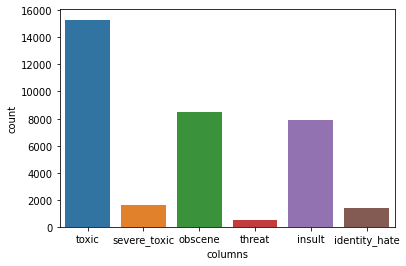

In [38]:
sns.barplot(
    x='columns',
    y='count',
    data=pd.DataFrame({
        'columns': feature_cols,
        'count': [len(y[y[col] == 1]) for col in feature_cols]
    })
)

<AxesSubplot:xlabel='columns', ylabel='count'>

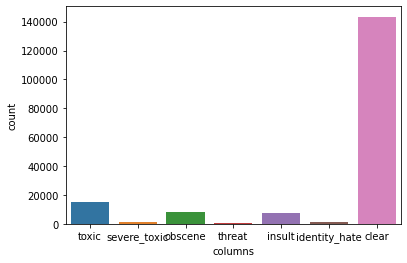

In [39]:
sns.barplot(
    x='columns',
    y='count',
    data=pd.DataFrame({
        'columns': feature_cols + ['clear'],
        'count': [len(y[y[col] == 1]) for col in feature_cols] + [neutral_or_positive]
    })
)

In [48]:
for _ in range(10):
    comment = data.iloc[randint(0, len(X) - 1)]
    print("----------------------------")
    print(comment.comment_text)
    print(f"{comment[feature_cols]}")

----------------------------
Polar Air 

Polar Air no longer have a hangar at Prestwick airport.
It was taken over in some way by Atlas Air who then closed the hangar. I don't know details which is why I'm not editing it myself.
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: de45c85706947783, dtype: object
----------------------------
The article should be unprotected on 25 October . After the article published on Le Monde newspaper , it's been recalled on the French talk page that hiding specific dimensions of a topic is considered WP:POV . The current montage doesn't even show the actual city, only a collection of lifeless landmarks close-ups. For the matter, this has raised enough concerns in France for the story to be also mentioned on a major radio, Europe 1 . This is why, I believe the better way to calm things out is to go for the conservative option which is to use the same image in the English version tha